In [1]:
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

from common import load_data


In [2]:
# --- Load the dataset and check distributions --- #
main_df = load_data('exp2_data.csv', verbose=False)


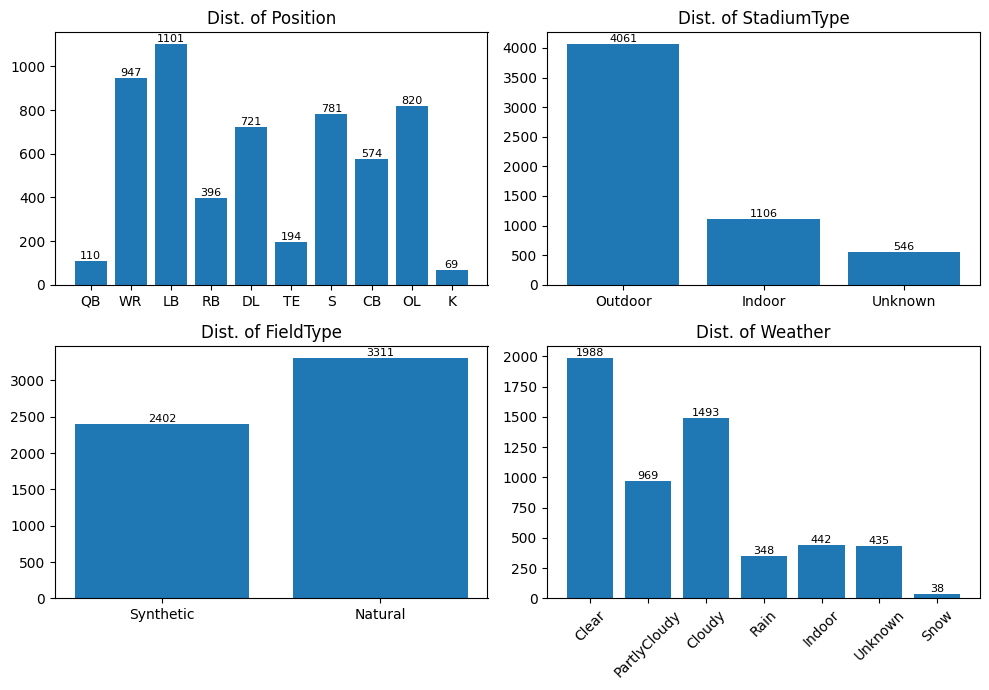

In [3]:
# --- Check categorical feature distributions --- #
dist_plot_cols = ['Position', 'StadiumType', 'FieldType', 'Weather']

fig, axs = plt.subplots(2, 2, figsize=(10, 7), tight_layout=True)
axs = axs.flatten()

for i in range(len(dist_plot_cols)):
    counts = Counter(main_df[dist_plot_cols[i]])
    categories = list(counts.keys())
    frequencies = list(counts.values())
    rects = axs[i].bar(categories, frequencies, width=0.8, align='center')
    axs[i].bar_label(rects, fontsize=8)
    axs[i].set_title('Dist. of {}'.format(dist_plot_cols[i]))

plt.xticks(rotation=45)
plt.show()


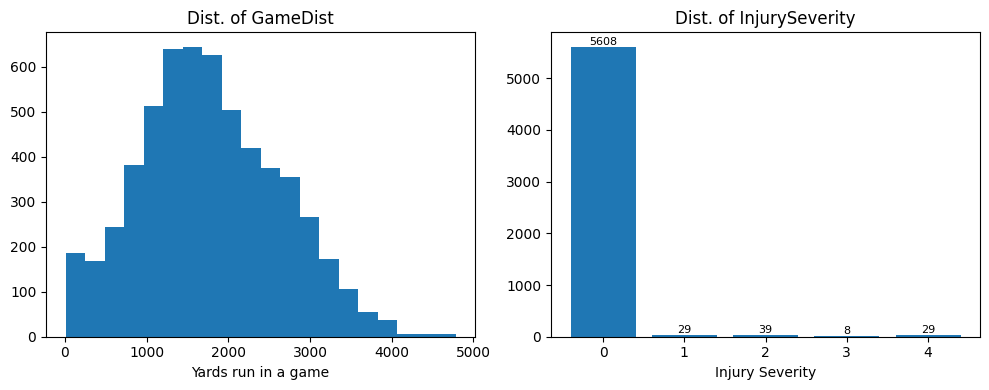

In [4]:
# --- Check ordinal feature distributions --- #
dist_plot_cols = ['GameDist', 'InjurySeverity']

fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
axs = axs.flatten()

rects = axs[0].hist(main_df[dist_plot_cols[0]], bins=20)
axs[0].set_title('Dist. of {}'.format(dist_plot_cols[0]))
axs[0].set_xlabel('Yards run in a game')

counts = Counter(main_df[dist_plot_cols[1]])
categories = list(counts.keys())
frequencies = list(counts.values())
rects = axs[1].bar(categories, frequencies, width=0.8, align='center')
axs[1].bar_label(rects, fontsize=8)
axs[1].set_title('Dist. of {}'.format(dist_plot_cols[1]))
axs[1].set_xlabel('Injury Severity')

plt.show()


/var/folders/33/4fqcfxgx5078w5btpn5rs85m0000gq/T/ipykernel_7416/399183149.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_df['Position'] = numeric_df['Position'].replace({'LB': 1, 'WR': 2, 'OL': 3, 'DL': 4, 'S': 5, 'CB': 6, 'RB': 7, 'TE': 8, 'QB': 9, 'K': 10})
/var/folders/33/4fqcfxgx5078w5btpn5rs85m0000gq/T/ipykernel_7416/399183149.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_df['StadiumType'] = numeric_df['StadiumType'].replace({'Unknown': 0, 'Outdoor': 1, 'Indoor': 2})
/var/folders/33/4fqcfxgx5078w5bt

<Axes: >

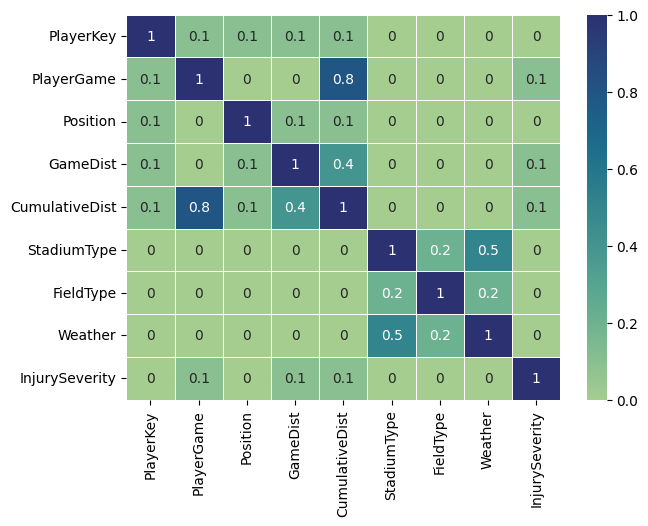

In [5]:
# --- Perform correlation analysis --- #

numeric_df = main_df
numeric_df['Position'] = numeric_df['Position'].replace({'LB': 1, 'WR': 2, 'OL': 3, 'DL': 4, 'S': 5, 'CB': 6, 'RB': 7, 'TE': 8, 'QB': 9, 'K': 10})
numeric_df['StadiumType'] = numeric_df['StadiumType'].replace({'Unknown': 0, 'Outdoor': 1, 'Indoor': 2})
numeric_df['FieldType'] = numeric_df['FieldType'].replace({'Natural': 0, 'Synthetic': 1})
numeric_df['Weather'] = numeric_df['Weather'].replace({'Unknown': 0, 'Indoor': 1, 'Clear': 2, 'PartlyCloudy': 3, 'Cloudy': 3, 'Rain': 4, 'Snow': 5})
numeric_df = numeric_df.drop(columns=['GameID'])

plt.figure(figsize=(7, 5))
corr = numeric_df.corr(method='pearson').round(1).abs()  # round to 1 decimal places and absolute value the negative correlations
sns.heatmap(corr, annot=True, cmap='crest', linewidths=.5)


In [7]:
# --- What percent of data is injury? --- #
injury_df = main_df[main_df['InjurySeverity'] != 0]
print('Num of injuries: {}'.format(injury_df.shape[0]))
print('Injuries: {}%'.format(round(injury_df.shape[0] / main_df.shape[0] * 100, 2)))


Num of injuries: 105
Injuries: 1.84%
